In [61]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [87]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df = df.loc[df[4] != "Iris-setosa"] 

IA = df.iloc[:,:].values

for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [7.0 3.2 4.7 1.4 'Iris-versicolor']
1 [6.4 3.2 4.5 1.5 'Iris-versicolor']
2 [6.9 3.1 4.9 1.5 'Iris-versicolor']
3 [5.5 2.3 4.0 1.3 'Iris-versicolor']
4 [6.5 2.8 4.6 1.5 'Iris-versicolor']
5 [5.7 2.8 4.5 1.3 'Iris-versicolor']
6 [6.3 3.3 4.7 1.6 'Iris-versicolor']
7 [4.9 2.4 3.3 1.0 'Iris-versicolor']
8 [6.6 2.9 4.6 1.3 'Iris-versicolor']
9 [5.2 2.7 3.9 1.4 'Iris-versicolor']
10 [5.0 2.0 3.5 1.0 'Iris-versicolor']
11 [5.9 3.0 4.2 1.5 'Iris-versicolor']
12 [6.0 2.2 4.0 1.0 'Iris-versicolor']
13 [6.1 2.9 4.7 1.4 'Iris-versicolor']
14 [5.6 2.9 3.6 1.3 'Iris-versicolor']
15 [6.7 3.1 4.4 1.4 'Iris-versicolor']
16 [5.6 3.0 4.5 1.5 'Iris-versicolor']
17 [5.8 2.7 4.1 1.0 'Iris-versicolor']
18 [6.2 2.2 4.5 1.5 'Iris-versicolor']
19 [5.6 2.5 3.9 1.1 'Iris-versicolor']
20 [5.9 3.2 4.8 1.8 'Iris-versicolor']
21 [6.1 2.8 4.0 1.3 'Iris-versicolor']
22 [6.3 2.5 4.9 1.5 'Iris-versicolor']
23 [6.1 2.8 4.7 1.2 'Iris-versicolor']
24 [6.4 2.9 4.3 1.3 'Iris-versicolor']
25 [6.6 3.0 4.4 1.4 'Iris-versicolo

In [65]:
IC = np.unique(IA[:,4])
print (IC)

['Iris-versicolor' 'Iris-virginica']


In [66]:
pltC = ('red', 'blue')
pltM = ('o', 'x')
for i in range(0,2):
    print(IC[i], pltC[i])

Iris-versicolor red
Iris-virginica blue


In [68]:
IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


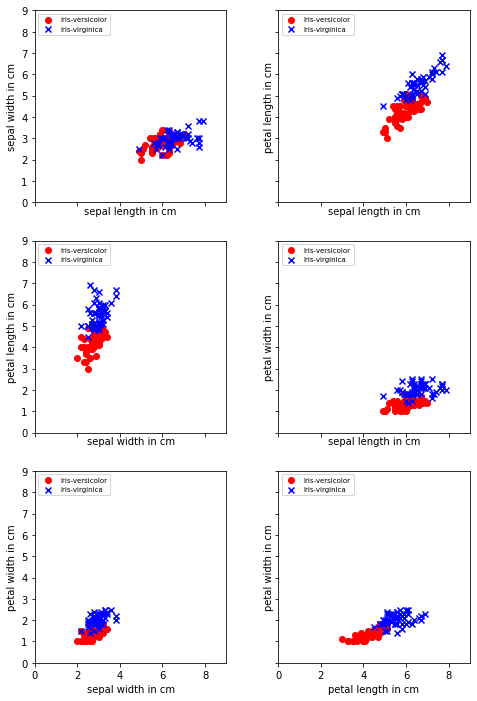

In [83]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)


i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
                          marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()

In [86]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [88]:
# focus on classification of "versicolor" and "virginica", class indexes 0 and 1; 
# set to 1 and -1 in class array
cdx = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

In [89]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

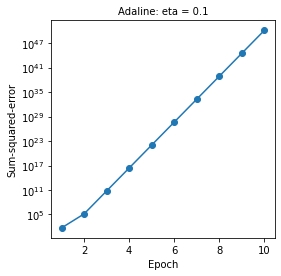

In [90]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show()

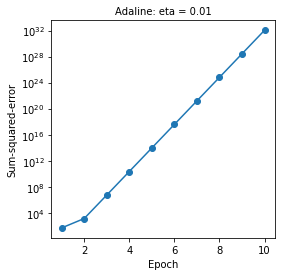

In [91]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show()

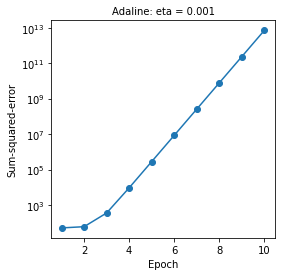

In [92]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show()

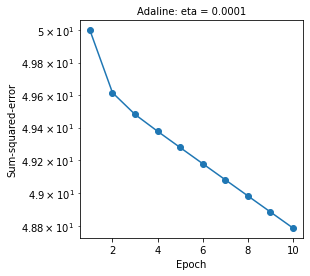

In [93]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

In [94]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

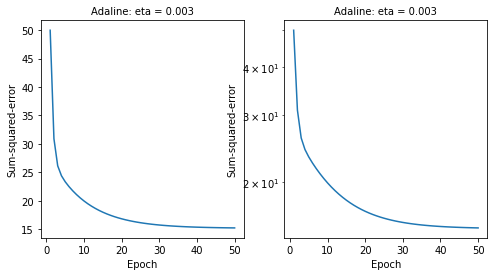

In [95]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

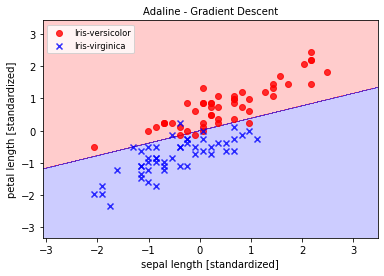

In [96]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup color map
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [97]:
print(ada.accuracy(NF_Std, NC))

0.94
